# Programmieraufgaben zur 2. Sonderübung

## Aufgabe 2. c), d) & e)
In dieser Aufgabe sollen Sie die Performance des Gradientenverfahrens (aus der letzten Sonderübung) mit dem Gauß-Newton Verfahren vergleichen.

<h1>noch bestehende Probleme & TODO: Contours fixen, prüfen des GN - Verfahrens</h1>

In [21]:
import numpy as np
from numpy.linalg import *
import time

### Die Zielfunktion
Implementieren Sie je eine Funktion für den Funktionswert und eine für den Gradienten von NLS

In [22]:
def r (x):
    """
    inner function
    """

    return np.array([10*(x[1]-x[0]**2), 1-x[0]])

def r_jac(x):
    """
    Jacobian of the inner function
    """
  
    r_jac=np.array([[-20*x[0], 10],[-1,0]])

    return r_jac
    
def h(x):
    """
    Value of Rosenbrock function
    """
   
    h_val=0.5*(r(x)@r(x).T)
    
    return h_val

def h_grad(x):
    """
    Gradient of Rosenbrock function
    """
   
    return r_jac(x).T@r(x)

### 3d Plot der Zielfunktion

In [23]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib notebook

<IPython.core.display.Javascript object>


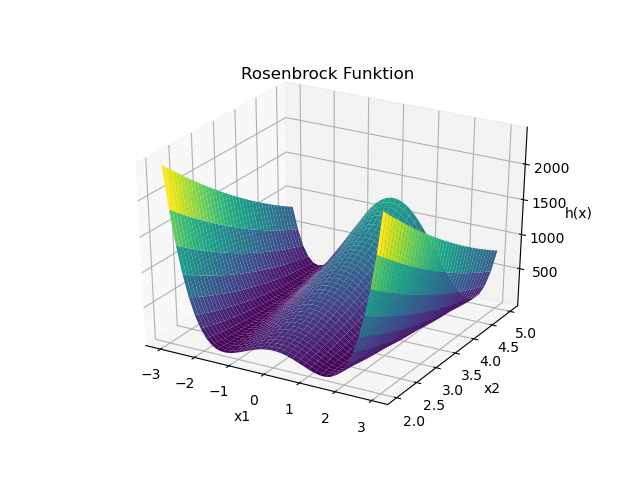

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-3, 3, 40)
y = np.linspace(2, 5, 40)

X, Y = np.meshgrid(x, y)

Z=0.5*((10*(Y-X**2))**2+(1-X)**2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('h(x)')
ax.set_title("Rosenbrock Funktion")

ax.plot_surface(X,Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

### Höhenlinienplot der Zielfunktion
Plotten sie mit `plt.contour` die vorgegebenen Höhenlinien der Zielfunktion.

In [25]:
levels = np.hstack((np.arange(0,0.9,0.1),np.arange(1,9,1),np.arange(10,300,20)))


<IPython.core.display.Javascript object>


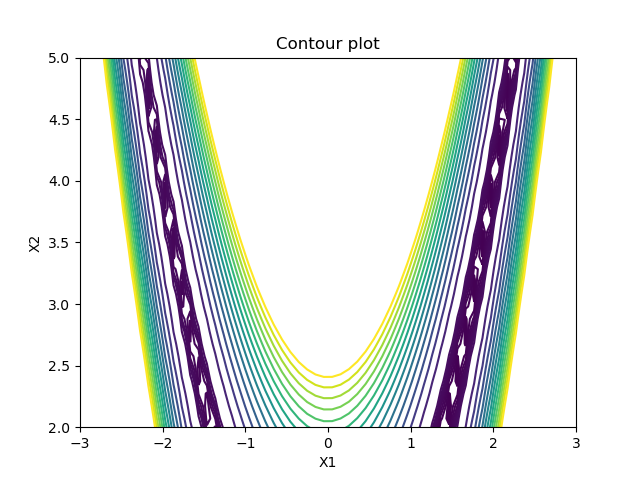

In [26]:
plt.figure()


x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)

X1, X2 = np.meshgrid(x1, x2)

Z2=0.5*((10*(X2-X1**2))**2+(1-X1)**2)
#Z=0.5*((10*(Y-X**2))**2+(1-X)**2)


plt.title('Contour plot')

plt.xlabel('X1')
plt.ylabel('X2')

contours = plt.contour(X1, X2, Z2, levels=levels)

plt.xlim(-3, 3)
plt.ylim(2, 5)

plt.show()

### Das Gradientenverfahren
Benutzen Sie hierfür die Implementierung aus der 1. Sonderübung (falls Sie nicht teilgenommen haben, ist die Vorlage hier gegeben).

In [27]:
def gradientDescent(obj_func, grad_func, line_search, x_0, epsilon):

    """" classical gradient descent
    
    Input
    ----------
    
    obj_fun: callable
        Objective function to be mimimized.
            Input: ndarray, 
            Output: float
        
    grad_fun: callable
        Gradient of objective function.
            Input: ndarray, 
            Output: ndarray, 
    
    line_search: callable
        Line-search procedure to be used in the algorithm.
            Input: x: ndarray
                    Starting point of the method.
                   d: ndarray
                    Starting direction of the method (negative gradient). 
            Output: float
        
    x_0: ndarray
        Starting point of the method.
       
    epsilon: float
        Tolerance for the termination of the method.
        
        
    Output
    -------
    
    x_crit: ndarray
        Approx. of a critical point of the objective function.
    
    f_crit: float
        Objective value at x_opt
        
    k: int
        Number of iterations.
        
    runtime: float
        Runtime of the algorithm.
    
    """
    conv=[]#Variable zum Prüfen der Konvergenzgeschwindigkeit
    start_time = time.time()
    k = 0
    x = x_0
    f_grad = grad_func(np.transpose(x)) # Gradienten von f an x auswerten
    d = -f_grad # Suchrichtung ergänzen
    while np.linalg.norm(f_grad, ord=2)>epsilon: # Abbruchkriterium ergänzen
        #conv.append(np.linalg.norm(f_grad, ord=2))
        conv.append(h(x))
        t = line_search(x,d) # Schrittweite bestimmen
        x = x+np.transpose(t*d) # Update der aktuellen Iterierten
        f_grad = grad_func(np.transpose(x)) # Gradient von f an neuer Iterierter
        d = -f_grad # Suchrichtung ergänzen
        k += 1
    x_crit = x # Approximation eines kritischen Punktes
    f_crit = obj_func (np.transpose(x_crit))
    runtime = time.time()-start_time
    return x_crit, f_crit, k, runtime, conv

### Schrittweitensteuerung
Nutzen Sie die in der letzten Sonderübung implementierte Armijo-Regel (falls Sie nicht teilgenommen haben, befindet sich hier eine Vorlage), passen Sie diese gegebenenfalls so an, dass sie sowohl vom Gradientenverfahren, als auch vom Gauß-Newton Verfahren aufgerufen werden kann.

In [28]:
def armijo(x, d, obj_func, grad_func, sigma, rho, gamma):
    
    """ Armijo stepzise for gradient descent
    
    Parameters
    ----------
    
    x: ndarray
        Current iterate of the optimization algorithm.
        
    d: ndarray
        Search direction.
    
    obj_fun: callable
        Objective function to be mimimized. Returns a number.
        
    grad_fun: callable
        returns gradient (with respect to x) of obj_func at x, returns ndarray, shape (2,)
       
    sigma: float
        Parameter that determines flatness of damped tangent. (0<sigma<1)
    
    rho: float
        Parameter that determines how fast stepsize is decreaded. (0<rho<1)
        
    gamma: float
        Parameter that determines appropriate starting stepsize.
    
   
        
        
    Returns
    -------
    
    t: float
        Armijo stepsize.
    
    """
    
    f_value = obj_func(np.transpose(x))
    t = (-1)*gamma*np.transpose(grad_func(np.transpose(x)))@d/(np.linalg.norm(d,ord=2)**2) # Start-Schrittweite (t_0 in Algorithmus 2.4)
    x_trial = x+np.transpose(t*d) # Schritt in Richtung d mit Schrittweite t
    f_trial = obj_func(np.transpose(x_trial)) # Funktionswert am Punkt x_trial
    while (f_trial>(f_value+sigma*t*np.transpose(grad_func(np.transpose(x)))@d)): # Abbruchkriterium ergänzen:
        t = t*rho # Schrittweite updaten
        x_trial = x+np.transpose(t*d) # Schritt in Richtung d mit neuer Schrittweite t
        f_trial = obj_func(np.transpose(x_trial)) # Funktionswert am neuen Punkt x_trial
        
    if np.linalg.norm(t*d) < 10**(-14):
        t = 10**(-7)
        
    return t

### Das Gauß-Newton-Verfahren
Implementieren Sie hier das Gauß-Newton-Verfahren. Orientieren Sie sich hierbei an Algorithmus 2.6 und den Angaben auf S.84 im Buch 

In [29]:
def gaussnewton_method(h_val, h_grad, r_jac, x_start, line_search, tol):
    
    """ Gauss-Newton-Method
    
    Parameters
    ----------
    
    h_val: callable
        function value of nonlinear least squares problem
            Input: x: ndarray
            Output h_val: float
            
    h_grad: callable
        gradient of nonlinear least squares problem

    r_jac: callable
        Jacobian of inner function
        
    x_start: ndarray
        start iterate of the optimization algorithm.
        
    line_search: callable
        Line-search procedure to be used in the algorithm.
    
    tol: float
        tolerance parameter for stopping rule
        
        
    Returns
    -------
    
    x_crit: ndarray
        Approx. of a critical point of the objective function.
    
    f_crit: float
        Objective value at x_crit
        
    k: int
        Number of iterations.
        
    runtime: float
        Runtime of the algorithm.
    
    """
    
    start_time = time.time()
    conv2=[]#Variable zum Prüfen der Konvergenzgeschwindigkeit
    k = 0
    x = x_start #x auf Startpunkt setzen
    A=r_jac(x).transpose()@r_jac(x) #Matrix A bestimmen
    f_grad = h_grad(np.transpose(x)) # Gradienten von f an x auswerten
    d = -np.linalg.inv(A)@f_grad # Suchrichtung ergänzen
    while np.linalg.norm(f_grad, ord=2)>tol: # Abbruchkriterium ergänzen
        #conv2.append(np.linalg.norm(f_grad, ord=2))
        conv2.append(h(x))
        d = -np.linalg.inv(A)@f_grad
        t = line_search(x,d) # Schrittweite bestimmen
        x = x+np.transpose(t*d) # Update der aktuellen Iterierten
        f_grad = h_grad(x.T) # Gradient von f an neuer Iterierter
        A=r_jac(x).transpose()@r_jac(x) #A updaten
        A=A.transpose()
        k += 1
    x_crit = x # Approximation eines kritischen Punktes
    h_crit = h_val (np.transpose(x_crit))
    runtime = time.time()-start_time
    
    return x_crit, h_crit, k, runtime, conv2

### Ausführung beider Verfahren

Zunächst sollte erneut ein Handle für die Armijo-Regel mit der lambda-Notation und die dafür notwendigen Parameter definiert werden.

In [30]:
sigma = 0.5
rho = 0.4
gamma = 1
armijo_rule = lambda x, d: armijo(x, d, h, h_grad, sigma, rho, gamma)
tol=0.0001
start=np.array([2,5])

Führen Sie nun beide Verfahren mit der Startpunkt $x^0 = (2,5)^\top$ und der Toleranz $\varepsilon = 10^{-4}$ aus.

In [31]:
res_gradDes_X, res_gradDes_h, k1, run1, conv=gradientDescent(h, h_grad, armijo_rule, start, tol)

res_Gauss_N_X, res_Gauss_N_h, k2, run2, conv2=gaussnewton_method(h, h_grad, r_jac, start, armijo_rule, tol)

print("Laufzeit Gradientenverfahren:")
print(run1)
print("Laufzeit Gauß-Newton-Verfahren:")
print(run2)
print("Approximation Gradientenverfahren:")
print(res_gradDes_X)
print("Approximation Gauß-Newton-Verfahren:")
print(res_Gauss_N_X)
print("Zielfunktionswert Gradientenverfahren:")
print(res_gradDes_h)
print("Zielfunktionswert Gauß-Newton-Verfahren:")
print(res_Gauss_N_h)

Laufzeit Gradientenverfahren:
2.585090398788452
Laufzeit Gauß-Newton-Verfahren:
0.0019986629486083984
Approximation Gradientenverfahren:
[1.00021968 1.0004402 ]
Approximation Gauß-Newton-Verfahren:
[1.00000254 1.00000468]
Zielfunktionswert Gradientenverfahren:
2.416099012358085e-08
Zielfunktionswert Gauß-Newton-Verfahren:
1.1304545981962541e-11


Diskutieren Sie die Ergebnisse:

In [32]:
len(conv)

8490

In [33]:
len(conv2)

18

<IPython.core.display.Javascript object>


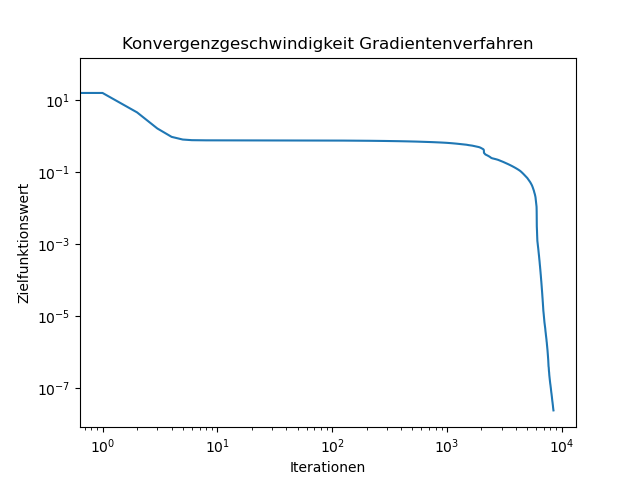

In [34]:
#Gradientenverfahren
plt.figure()
plt.plot(conv)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterationen')
plt.ylabel('Zielfunktionswert')
plt.title('Konvergenzgeschwindigkeit Gradientenverfahren')
plt.show()

<IPython.core.display.Javascript object>


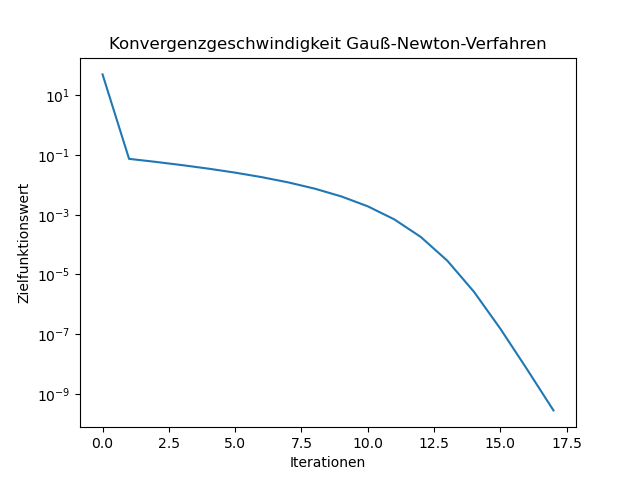

In [35]:
#Gauß-Newton
plt.figure()
plt.plot(conv2)
plt.yscale('log')
plt.xlabel('Iterationen')
plt.ylabel('Zielfunktionswert')
plt.title('Konvergenzgeschwindigkeit Gauß-Newton-Verfahren')
plt.show()

Während das Gradientenverfahren in 8490 Schritten eher langsam konvergiert und den Zigzagging-Effekt zeigt, wie in der Visualisierung gut zu erkennen, konvergiert das Gauß-Newton Verfahren in nur 18 Schritten sehr schnell unter die Schranke epsilon.

Visualisierung der Approximation des kritischen Punkts der beiden Verfahren. Das Gauß-Newton-Verfahren liefert hier einen niedrigeren Zielfunktionswert und ist zusätzlich weitaus schneller. 

<IPython.core.display.Javascript object>


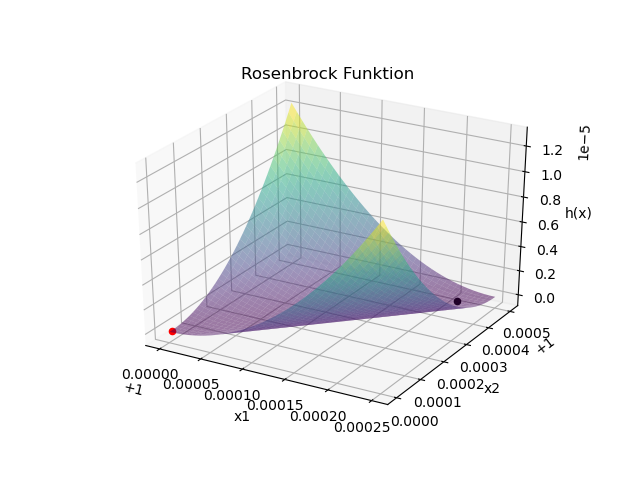

In [36]:
plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(1.000001, 1.00025, 40)
y = np.linspace(1.0, 1.0005, 40)

X, Y = np.meshgrid(x, y)

Z=0.5*((10*(Y-X**2))**2+(1-X)**2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('h(x)')
ax.set_title("Rosenbrock Funktion")

ax.plot_surface(X,Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.5)

ax.scatter(res_gradDes_X[0],res_gradDes_X[1], res_gradDes_h, c='black')
ax.scatter(res_Gauss_N_X[0],res_Gauss_N_X[1], res_Gauss_N_h, c='red')

plt.show()